In [1]:
from itertools import product
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from finite_volume.advection import AdvectionSolver
from configs import limiting_schemes_1d, problem_configs, solver_config
from utils import pd_xlsx_write

limiting_schemes = limiting_schemes_1d

viridis = mpl.colormaps["viridis"]


def color_p(p):
    return viridis(p / 7)

In [2]:
data = []
for lckey, p, integrator in product(
    ["aPrioriMPP", "aPosteriori", "aPosterioriB"],
    [1, 2, 3, 4, 5, 6, 7],
    ["SSPRK2", "SSPRK3", "RK4"],
):
    print(f"{lckey=}, {p=}, {integrator=}")
    solver = AdvectionSolver(
        n=256,
        order=p + 1,
        snapshot_dt=0.1,
        num_snapshots=10,
        **limiting_schemes[lckey],
        **problem_configs["composite"],
        **solver_config,
    )
    if lckey == "MUSCL-Hancock":
        if p != 1:
            continue
        else:
            solver.euler()
    if integrator == "SSPRK2":
        if p != 1:
            continue
        else:
            solver.ssprk2()
    elif integrator == "SSPRK3":
        if p < 2:
            continue
        solver.ssprk3()
    elif integrator == "RK4":
        if p < 3:
            continue
        solver.rk4()
    elif integrator == "RK6":
        if p < 4:
            continue
        solver.rk6()
    data.append(
        dict(
            scheme=lckey,
            p=p,
            integrator=integrator,
            delta=solver.compute_mpp_violations()[1]["worst"],
        )
    )
df = pd.DataFrame(data).sort_values(by="p")
df["integrator"] = df["integrator"].astype(
    pd.CategoricalDtype(["SSPRK2", "SSPRK3", "RK4"], ordered=True)
)
df["scheme"] = df["scheme"].astype(
    pd.CategoricalDtype(["aPrioriMPP", "aPosteriori", "aPosterioriB"], ordered=True)
)

pt = pd.pivot_table(df, index=["p", "integrator"], values="delta", columns="scheme")
pt

lckey='aPrioriMPP', p=1, integrator='SSPRK2'
lckey='aPrioriMPP', p=1, integrator='SSPRK3'
lckey='aPrioriMPP', p=1, integrator='RK4'
lckey='aPrioriMPP', p=2, integrator='SSPRK2'
lckey='aPrioriMPP', p=2, integrator='SSPRK3'
lckey='aPrioriMPP', p=2, integrator='RK4'
lckey='aPrioriMPP', p=3, integrator='SSPRK2'
lckey='aPrioriMPP', p=3, integrator='SSPRK3'
lckey='aPrioriMPP', p=3, integrator='RK4'
lckey='aPrioriMPP', p=4, integrator='SSPRK2'
lckey='aPrioriMPP', p=4, integrator='SSPRK3'
lckey='aPrioriMPP', p=4, integrator='RK4'
lckey='aPrioriMPP', p=5, integrator='SSPRK2'
lckey='aPrioriMPP', p=5, integrator='SSPRK3'
lckey='aPrioriMPP', p=5, integrator='RK4'
lckey='aPrioriMPP', p=6, integrator='SSPRK2'
lckey='aPrioriMPP', p=6, integrator='SSPRK3'
lckey='aPrioriMPP', p=6, integrator='RK4'
lckey='aPrioriMPP', p=7, integrator='SSPRK2'
lckey='aPrioriMPP', p=7, integrator='SSPRK3'
lckey='aPrioriMPP', p=7, integrator='RK4'
lckey='aPosteriori', p=1, integrator='SSPRK2'
lckey='aPosteriori', p=1, inte

scheme          aPrioriMPP   aPosteriori  aPosterioriB
p integrator                                          
1 SSPRK2     -2.220446e-18 -1.035279e-02 -4.573322e-03
2 SSPRK3     -2.816220e-19 -6.522528e-03 -8.696355e-04
3 SSPRK3     -2.122835e-11 -7.851846e-03 -2.051343e-04
  RK4        -1.095721e-11 -6.436738e-05 -5.370800e-05
4 SSPRK3     -1.575724e-12 -6.826841e-03 -2.829367e-04
  RK4        -3.905652e-11 -4.133956e-05 -6.426838e-05
5 SSPRK3     -5.430948e-11 -7.908252e-03 -2.078865e-04
  RK4        -3.272158e-12 -1.003413e-04 -1.403764e-08
6 SSPRK3     -1.431310e-11 -7.460520e-03 -1.970065e-04
  RK4        -1.496666e-13 -5.863835e-07 -2.378399e-07
7 SSPRK3     -4.333550e-14 -7.696473e-03 -2.644880e-04
  RK4        -5.696500e-11 -3.349662e-04 -1.811395e-06

In [3]:
print(pt.to_latex(float_format="%.2E"))

\begin{tabular}{llrrr}
\toprule
 & scheme & aPrioriMPP & aPosteriori & aPosterioriB \\
p & integrator &  &  &  \\
\midrule
1 & SSPRK2 & -2.22E-18 & -1.04E-02 & -4.57E-03 \\
\cline{1-5}
2 & SSPRK3 & -2.82E-19 & -6.52E-03 & -8.70E-04 \\
\cline{1-5}
\multirow[t]{2}{*}{3} & SSPRK3 & -2.12E-11 & -7.85E-03 & -2.05E-04 \\
 & RK4 & -1.10E-11 & -6.44E-05 & -5.37E-05 \\
\cline{1-5}
\multirow[t]{2}{*}{4} & SSPRK3 & -1.58E-12 & -6.83E-03 & -2.83E-04 \\
 & RK4 & -3.91E-11 & -4.13E-05 & -6.43E-05 \\
\cline{1-5}
\multirow[t]{2}{*}{5} & SSPRK3 & -5.43E-11 & -7.91E-03 & -2.08E-04 \\
 & RK4 & -3.27E-12 & -1.00E-04 & -1.40E-08 \\
\cline{1-5}
\multirow[t]{2}{*}{6} & SSPRK3 & -1.43E-11 & -7.46E-03 & -1.97E-04 \\
 & RK4 & -1.50E-13 & -5.86E-07 & -2.38E-07 \\
\cline{1-5}
\multirow[t]{2}{*}{7} & SSPRK3 & -4.33E-14 & -7.70E-03 & -2.64E-04 \\
 & RK4 & -5.70E-11 & -3.35E-04 & -1.81E-06 \\
\cline{1-5}
\bottomrule
\end{tabular}



delta_min=0.0
delta_min=0.0
p=2, lckey='aPrioriMPP', delta=-2.8162195363444714e-19
p=2, lckey='aPosterioriB', delta=-0.0008696354587625707
p=2, lckey='aPrioriMPP', delta=-2.8162195363444714e-19
p=2, lckey='aPosterioriB', delta=-0.0008696354587625707
p=3, lckey='aPrioriMPP', delta=-2.12283500948671e-11
p=3, lckey='aPosterioriB', delta=-5.3707996076618024e-05
p=3, lckey='aPrioriMPP', delta=-9.775043036428998e-11
p=3, lckey='aPosterioriB', delta=-0.00027796960672494755
p=5, lckey='aPrioriMPP', delta=-5.4309476381524106e-11
p=5, lckey='aPosterioriB', delta=-1.4037643037701875e-08
p=5, lckey='aPrioriMPP', delta=-6.061896742627334e-11
p=5, lckey='aPosterioriB', delta=-1.4037643037701875e-08
p=7, lckey='aPrioriMPP', delta=-4.3335498865776066e-14
p=7, lckey='aPosterioriB', delta=-1.8113945565138048e-06
p=7, lckey='aPrioriMPP', delta=-3.241245180047698e-14
p=7, lckey='aPosterioriB', delta=-6.023263595340607e-06


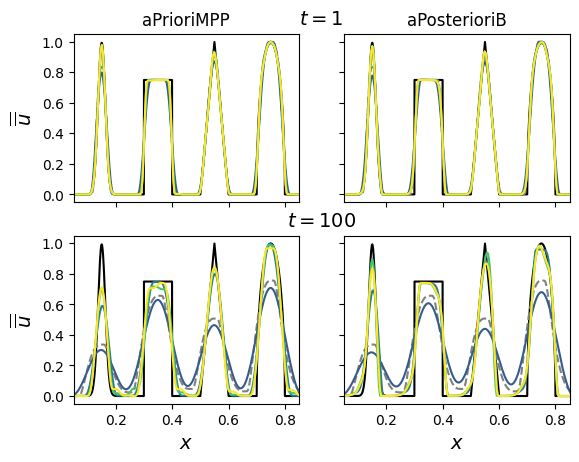

In [7]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

make_legend = False

# plot initial condition
high_res_initial_solver = AdvectionSolver(n=2048, **problem_configs["composite"])
for i, j in product(range(2), range(2)):
    high_res_initial_solver.plot_slice(axs[i, j], color="black")
    axs[i, j].set_xlim(0.05, 0.85)

# plot MUSCL-Hancock solution
for i, (snapshot_dt, num_snapshots) in enumerate([(0.1, 10), (1.0, 100)]):
    solver = AdvectionSolver(
        n=256,
        order=2,
        snapshot_dt=snapshot_dt,
        num_snapshots=num_snapshots,
        **limiting_schemes["MUSCL-Hancock"],
        **problem_configs["composite"],
        **solver_config,
    )
    solver.euler()
    print(f"delta_min={solver.compute_mpp_violations()[1]['worst']}")
    solver.plot_slice(axs[i, 0], color="grey", linestyle="--")
    solver.plot_slice(axs[i, 1], color="grey", linestyle="--")

# plot high order a priori limited solutions
degrees = [2, 3, 5, 7]

for (p, (i, (snapshot_dt, num_snapshots)), (j, lckey)) in product(
    degrees,
    enumerate([(0.1, 10), (1.0, 100)]),
    enumerate(["aPrioriMPP", "aPosterioriB"]),
):
    solver = AdvectionSolver(
        n=256,
        order=p + 1,
        snapshot_dt=snapshot_dt,
        num_snapshots=num_snapshots,
        **limiting_schemes[lckey],
        **problem_configs["composite"],
        **solver_config,
    )
    if limiting_schemes[lckey].get("apriori_limiting", False):
        solver.highest = 3
    solver.rkorder()
    solver.plot_slice(axs[i, j], color=color_p(p), label=f"${p=}$")
    print(f"{p=}, {lckey=}, delta={solver.compute_mpp_violations()[1]['worst']}")

# cosmetics
fontsize = 14
if make_legend:
    leg = axs[0, 1].legend(loc="center", bbox_to_anchor=(1.35, -0.1), fontsize=fontsize)
    for line, p in zip(leg.get_lines(), degrees):
        line.set_linestyle("none")
        line.set_marker("s")
        line.set_markersize(23)
        line.set_markerfacecolor(color_p(p))
for j in range(2):
    axs[1, j].set_xlabel("$x$", fontsize=fontsize)
for i in range(2):
    axs[i, 0].set_ylabel("$\overline{\overline{u}}$", fontsize=fontsize)
axs[0, 0].set_title("aPrioriMPP")
axs[0, 1].set_title("aPosterioriB")
axs[0, 0].text(
    0.93,
    1.15,
    "$t=1$",
    horizontalalignment="center",
    verticalalignment="center",
    size=fontsize,
)
axs[1, 0].text(
    0.93,
    1.15,
    "$t=100$",
    horizontalalignment="center",
    verticalalignment="center",
    size=fontsize,
)

fig.savefig(
    "images/images_apriori_vs_aposteriori_composite.png", dpi=300, bbox_inches="tight"
)